HR: https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe || https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/ || Cadet Will Riley for helping create the the win lose draw precentage ||  Google for pandas command, methods, and syntax help || Google Colab "KA" and "Linear Regession"


Reid Cox Adn Dylan Palmer

In [ ]:
from pandas.core.indexes.base import InvalidIndexError
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ufc-fighters-statistics.csv')

In [ ]:
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Rex Richards,NaN,7,2,0,195.58,120.20,NaN,NaN,NaN,17.65,58.0,5.29,72.0,0.0,0.0,0.0,17.65
1,Luana Santos,NaN,6,1,0,167.64,56.70,170.18,Orthodox,2000-04-16,17.10,60.0,6.52,68.0,0.0,0.0,100.0,17.10
2,Cortavious Romious,Are You Not Entertained?,7,2,0,162.56,61.23,172.72,Southpaw,1994-01-06,14.48,31.0,20.69,41.0,0.0,0.0,0.0,14.48
3,Danny Silva,El Puma,8,1,0,180.34,65.77,177.80,Switch,1997-01-30,13.60,64.0,13.13,59.0,2.0,66.0,100.0,13.60
4,Angel Pacheco,NaN,7,2,0,172.72,65.77,177.80,Orthodox,1992-01-13,13.13,40.0,13.60,35.0,0.0,0.0,33.0,13.13


In [ ]:
#Variables
#  Name = dropped
#  Nickname =dropped useless
#  Wins
#  Losses
#  Draws
#  height_cm
#  weight_in_kg
#  reach_in_cm
#  stance
#  date_of_birth = dropped useless
#  significant_strikes_landed_per_minute
#  significant_striking_accuracy
#  significant_strikes_absorbed_per_minute
#  significant_strike_defence
#  average_takedowns_landed_per_15_minutes = dropped inconsistant data
#  takedown_accuracy = droped inconsistnat data
#  takedown_defense = dropped inconsistant data
#  average_submissions_attempted_per_15_minutes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4109 non-null   object 
 1   nickname                                      2255 non-null   object 
 2   wins                                          4109 non-null   int64  
 3   losses                                        4109 non-null   int64  
 4   draws                                         4109 non-null   int64  
 5   height_cm                                     3812 non-null   float64
 6   weight_in_kg                                  4022 non-null   float64
 7   reach_in_cm                                   2183 non-null   float64
 8   stance                                        3287 non-null   object 
 9   date_of_birth                                 2975 non-null   o

This is not a good reading for if it is null becasue many of these are 0 instead of null, where there should be some value

In [ ]:
df = df.drop(['name'], axis=1)
df = df.drop(['nickname'], axis=1) #not needed
df = df.drop(['date_of_birth'], axis=1) #date of birth does not matter, it does not tell how old they were when they were fighting , just when born
df = df.drop(['average_takedowns_landed_per_15_minutes'], axis=1)
df = df.drop(['takedown_accuracy'], axis=1)
df = df.drop(['takedown_defense'], axis=1)

In [ ]:
df.head()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_submissions_attempted_per_15_minutes
0,7,2,0,195.58,120.20,NaN,NaN,17.65,58.0,5.29,72.0,17.65
1,6,1,0,167.64,56.70,170.18,Orthodox,17.10,60.0,6.52,68.0,17.10
2,7,2,0,162.56,61.23,172.72,Southpaw,14.48,31.0,20.69,41.0,14.48
3,8,1,0,180.34,65.77,177.80,Switch,13.60,64.0,13.13,59.0,13.60
4,7,2,0,172.72,65.77,177.80,Orthodox,13.13,40.0,13.60,35.0,13.13


In [ ]:
df.isnull().sum() #checks missing values in data set

wins                                               0
losses                                             0
draws                                              0
height_cm                                        297
weight_in_kg                                      87
reach_in_cm                                     1926
stance                                           822
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_submissions_attempted_per_15_minutes       0
dtype: int64

In [ ]:
df.duplicated().sum() #check if rows are duplicates

54

In [ ]:
dfresult = df.dropna(how='any', axis=0) #drops all rows with N/A values

In [ ]:
dfresult.duplicated().sum() #check if rows are duplicates

0

In [ ]:
dfresult = dfresult.drop(dfresult[dfresult['significant_strikes_landed_per_minute'] == 0].index)
dfresult = dfresult.drop(dfresult[dfresult['significant_striking_accuracy'] == 0].index)
dfresult = dfresult.drop(dfresult[dfresult['significant_strikes_absorbed_per_minute'] == 0].index)
dfresult = dfresult.drop(dfresult[dfresult['significant_strike_defence'] == 0].index)
dfresult = dfresult.drop(dfresult[dfresult['average_submissions_attempted_per_15_minutes'] == 0].index)
#If the fighter had a fight none of these values could be zeros so we drop those rows adn inconsistant data

In [ ]:
dfresult.head()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_submissions_attempted_per_15_minutes
1,6,1,0,167.64,56.70,170.18,Orthodox,17.10,60.0,6.52,68.0,17.10
2,7,2,0,162.56,61.23,172.72,Southpaw,14.48,31.0,20.69,41.0,14.48
3,8,1,0,180.34,65.77,177.80,Switch,13.60,64.0,13.13,59.0,13.60
4,7,2,0,172.72,65.77,177.80,Orthodox,13.13,40.0,13.60,35.0,13.13
5,8,3,0,170.18,61.23,170.18,Orthodox,13.00,65.0,4.00,63.0,13.00


In [ ]:
dfresult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 1 to 3336
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   wins                                          2137 non-null   int64  
 1   losses                                        2137 non-null   int64  
 2   draws                                         2137 non-null   int64  
 3   height_cm                                     2137 non-null   float64
 4   weight_in_kg                                  2137 non-null   float64
 5   reach_in_cm                                   2137 non-null   float64
 6   stance                                        2137 non-null   object 
 7   significant_strikes_landed_per_minute         2137 non-null   float64
 8   significant_striking_accuracy                 2137 non-null   float64
 9   significant_strikes_absorbed_per_minute       2137 non-null   f

In [ ]:
dfresult.tail()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_submissions_attempted_per_15_minutes
3315,10,5,0,177.80,61.23,177.80,Southpaw,0.20,75.0,2.07,42.0,0.20
3319,9,1,0,175.26,83.91,187.96,Orthodox,0.18,8.0,6.14,36.0,0.18
3320,10,5,0,177.80,83.91,180.34,Orthodox,0.18,12.0,4.03,56.0,0.18
3332,8,4,0,172.72,77.11,187.96,Orthodox,0.13,33.0,0.80,71.0,0.13
3336,4,2,0,182.88,120.20,195.58,Orthodox,0.07,8.0,1.60,44.0,0.07


In [ ]:
dfresult['Win-loss-presentage'] = round((dfresult['wins']/(dfresult['losses']+dfresult['wins']+ dfresult['draws'])),2)




In [ ]:
dfresult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 1 to 3336
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   wins                                          2137 non-null   int64  
 1   losses                                        2137 non-null   int64  
 2   draws                                         2137 non-null   int64  
 3   height_cm                                     2137 non-null   float64
 4   weight_in_kg                                  2137 non-null   float64
 5   reach_in_cm                                   2137 non-null   float64
 6   stance                                        2137 non-null   object 
 7   significant_strikes_landed_per_minute         2137 non-null   float64
 8   significant_striking_accuracy                 2137 non-null   float64
 9   significant_strikes_absorbed_per_minute       2137 non-null   f

The Data is now cleaned and prepocessed from null values, inconsistnat data, and irrelevant columns

In [ ]:
dfresult['stance'] = dfresult['stance'].replace({1 : 'Orthodox', 2 : 'Southpaw', 3: 'Switch', 4: 'Open Stance'})

#make everything nurmeric data




In [ ]:
dfresult

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_submissions_attempted_per_15_minutes,Win-loss-presentage
1,6,1,0,167.64,56.70,170.18,Orthodox,17.10,60.0,6.52,68.0,17.10,0.86
2,7,2,0,162.56,61.23,172.72,Southpaw,14.48,31.0,20.69,41.0,14.48,0.78
3,8,1,0,180.34,65.77,177.80,Switch,13.60,64.0,13.13,59.0,13.60,0.89
4,7,2,0,172.72,65.77,177.80,Orthodox,13.13,40.0,13.60,35.0,13.13,0.78
5,8,3,0,170.18,61.23,170.18,Orthodox,13.00,65.0,4.00,63.0,13.00,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,10,5,0,177.80,61.23,177.80,Southpaw,0.20,75.0,2.07,42.0,0.20,0.67
3319,9,1,0,175.26,83.91,187.96,Orthodox,0.18,8.0,6.14,36.0,0.18,0.90
3320,10,5,0,177.80,83.91,180.34,Orthodox,0.18,12.0,4.03,56.0,0.18,0.67
3332,8,4,0,172.72,77.11,187.96,Orthodox,0.13,33.0,0.80,71.0,0.13,0.67


In [ ]:
#build regression model
dfresult= pd.get_dummies(dfresult, columns=['stance'])

In [ ]:
x = dfresult.drop(['Win-loss-presentage'], axis=1)
y =dfresult[['Win-loss-presentage']]

In [ ]:
x.shape

(2137, 15)

In [ ]:
x

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_submissions_attempted_per_15_minutes,stance_Open Stance,stance_Orthodox,stance_Southpaw,stance_Switch
1,6,1,0,167.64,56.70,170.18,17.10,60.0,6.52,68.0,17.10,0,1,0,0
2,7,2,0,162.56,61.23,172.72,14.48,31.0,20.69,41.0,14.48,0,0,1,0
3,8,1,0,180.34,65.77,177.80,13.60,64.0,13.13,59.0,13.60,0,0,0,1
4,7,2,0,172.72,65.77,177.80,13.13,40.0,13.60,35.0,13.13,0,1,0,0
5,8,3,0,170.18,61.23,170.18,13.00,65.0,4.00,63.0,13.00,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,10,5,0,177.80,61.23,177.80,0.20,75.0,2.07,42.0,0.20,0,0,1,0
3319,9,1,0,175.26,83.91,187.96,0.18,8.0,6.14,36.0,0.18,0,1,0,0
3320,10,5,0,177.80,83.91,180.34,0.18,12.0,4.03,56.0,0.18,0,1,0,0
3332,8,4,0,172.72,77.11,187.96,0.13,33.0,0.80,71.0,0.13,0,1,0,0


In [ ]:
y.shape

(2137, 1)

In [ ]:
y

,Win-loss-presentage
1,0.86
2,0.78
3,0.89
4,0.78
5,0.73
...,...
3315,0.67
3319,0.90
3320,0.67
3332,0.67


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state =1)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
for idx, col_name in enumerate(X_train.columns):
  print("the coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

the coefficient for wins is 0.012506621923289326
the coefficient for losses is -0.0321120057881943
the coefficient for draws is -0.022618754390111198
the coefficient for height_cm is 0.000101596651970964
the coefficient for weight_in_kg is 1.5667221682499205e-05
the coefficient for reach_in_cm is -1.8870033893296848e-05
the coefficient for significant_strikes_landed_per_minute is 0.0031669603101046806
the coefficient for significant_striking_accuracy is 0.0003460407501996118
the coefficient for significant_strikes_absorbed_per_minute is -0.003680627728337594
the coefficient for significant_strike_defence is -0.0005032755853800423
the coefficient for average_submissions_attempted_per_15_minutes is 0.0031669603101046728
the coefficient for stance_Open Stance is 0.004081744934054081
the coefficient for stance_Orthodox is -0.002824159497229438
the coefficient for stance_Southpaw is -0.002413921839710653
the coefficient for stance_Switch is 0.001156336402886018


In [ ]:
intercept = regression_model.intercept_[0]
print("the intercept for our model is {}".format(intercept))

the intercept for our model is 0.721348526311045


In [ ]:
pred_train = regression_model.predict(X_train)
pred_test = regression_model.predict(X_test)

In [ ]:
Equation = "win/loss = " + str(regression_model.intercept_)

print(Equation, end = " ")

for i in range(len(X_train.columns)):
  if i != len(X_train.columns) - 1:
    print(
        "+ (",
        regression_model.coef_[0][i],
        ")*(",
        X_train.columns[i],
        ")",
        end = " ",
    )
  else:
    print("+ (", regression_model.coef_[0][i], ")*(", X_train.columns[i], ")")

win/loss = [0.72134853] + ( 0.012506621923289326 )*( wins ) + ( -0.0321120057881943 )*( losses ) + ( -0.022618754390111198 )*( draws ) + ( 0.000101596651970964 )*( height_cm ) + ( 1.5667221682499205e-05 )*( weight_in_kg ) + ( -1.8870033893296848e-05 )*( reach_in_cm ) + ( 0.0031669603101046806 )*( significant_strikes_landed_per_minute ) + ( 0.0003460407501996118 )*( significant_striking_accuracy ) + ( -0.003680627728337594 )*( significant_strikes_absorbed_per_minute ) + ( -0.0005032755853800423 )*( significant_strike_defence ) + ( 0.0031669603101046728 )*( average_submissions_attempted_per_15_minutes ) + ( 0.004081744934054081 )*( stance_Open Stance ) + ( -0.002824159497229438 )*( stance_Orthodox ) + ( -0.002413921839710653 )*( stance_Southpaw ) + ( 0.001156336402886018 )*( stance_Switch )


In [ ]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

In [ ]:
print("R-squared training performance = ", r2_train)
print("R-squared testing performance = ", r2_test)

R-squared training performance =  0.7376370826700105
R-squared testing performance =  0.7715667434490504


In [ ]:
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)

In [ ]:
print("MAE training performance = ", mae_train)
print("MAE testing performance = ", mae_test)

MAE training performance =  0.037378099902263706
MAE testing performance =  0.03610000480407271


In [ ]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print("MSE training performance = ", mse_train)
print("MSE testing performance = ", mse_test)

MSE training performance =  0.0032084072711037275
MSE testing performance =  0.002759133930228685


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE training performance = ", rmse_train)
print("RMSE testing performance = ", rmse_test)

RMSE training performance =  0.056642804230579255
RMSE testing performance =  0.05252745882135062


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y_train, pred_train)
mape_test = mean_absolute_percentage_error(y_test, pred_test)

print("MAPE training performance = ", rmse_train)
print("MAPE testing performance = ", rmse_test)

MAPE training performance =  0.056642804230579255
MAPE testing performance =  0.05252745882135062


<ipython-input-39-5750c2c21d66>:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE training performance = ", rmse_train)
print("RMSE testing performance = ", rmse_test)

RMSE training performance =  0.056642804230579255
RMSE testing performance =  0.05252745882135062


In [ ]:
def adj_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n= predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1-r2) * (n-1) / (n-k-1))

adj_r2_train = adj_r2_score(X_train, y_train, pred_train)
adj_r2_test = adj_r2_score(X_train, y_test, pred_test)

print("adjust R-sqaure training preformance = ", adj_r2_train)
print("adjust R-sqaure testing preformance = ", adj_r2_test)

adjust R-sqaure training preformance =  0.7349762011555075
adjust R-sqaure testing preformance =  0.7692499761412315


Text(0, 0.5, 'Win-loss-presentage')

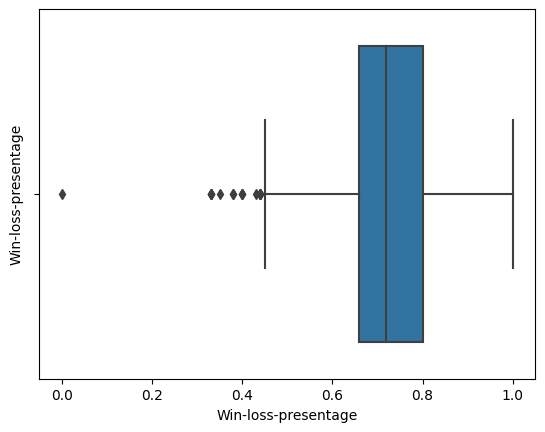

In [ ]:
sns.boxplot(data=dfresult, x='Win-loss-presentage')
plt.ylabel('Win-loss-presentage')

<Axes: xlabel='stance', ylabel='Count'>

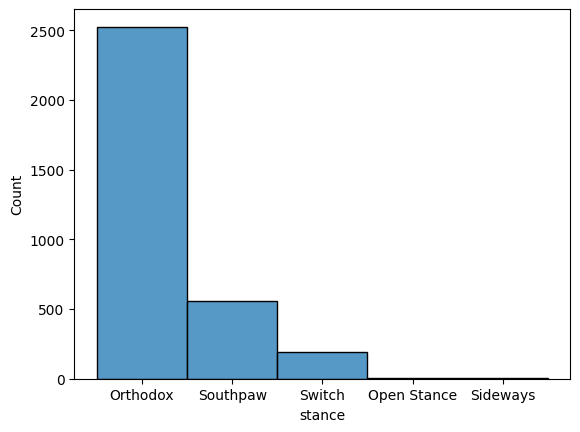

In [ ]:
sns.histplot(data =df, x ='stance')

In [ ]:
vars_of_interst = [ 'wins', 'losses', 'draws', 'Win-loss-presentage', 'weight_in_kg', 'reach_in_cm', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy',  'significant_strikes_absorbed_per_minute', 'significant_strike_defence' , 'average_submissions_attempted_per_15_minutes', 'stance_Switch' , 'stance_Southpaw', 'stance_Orthodox' ]

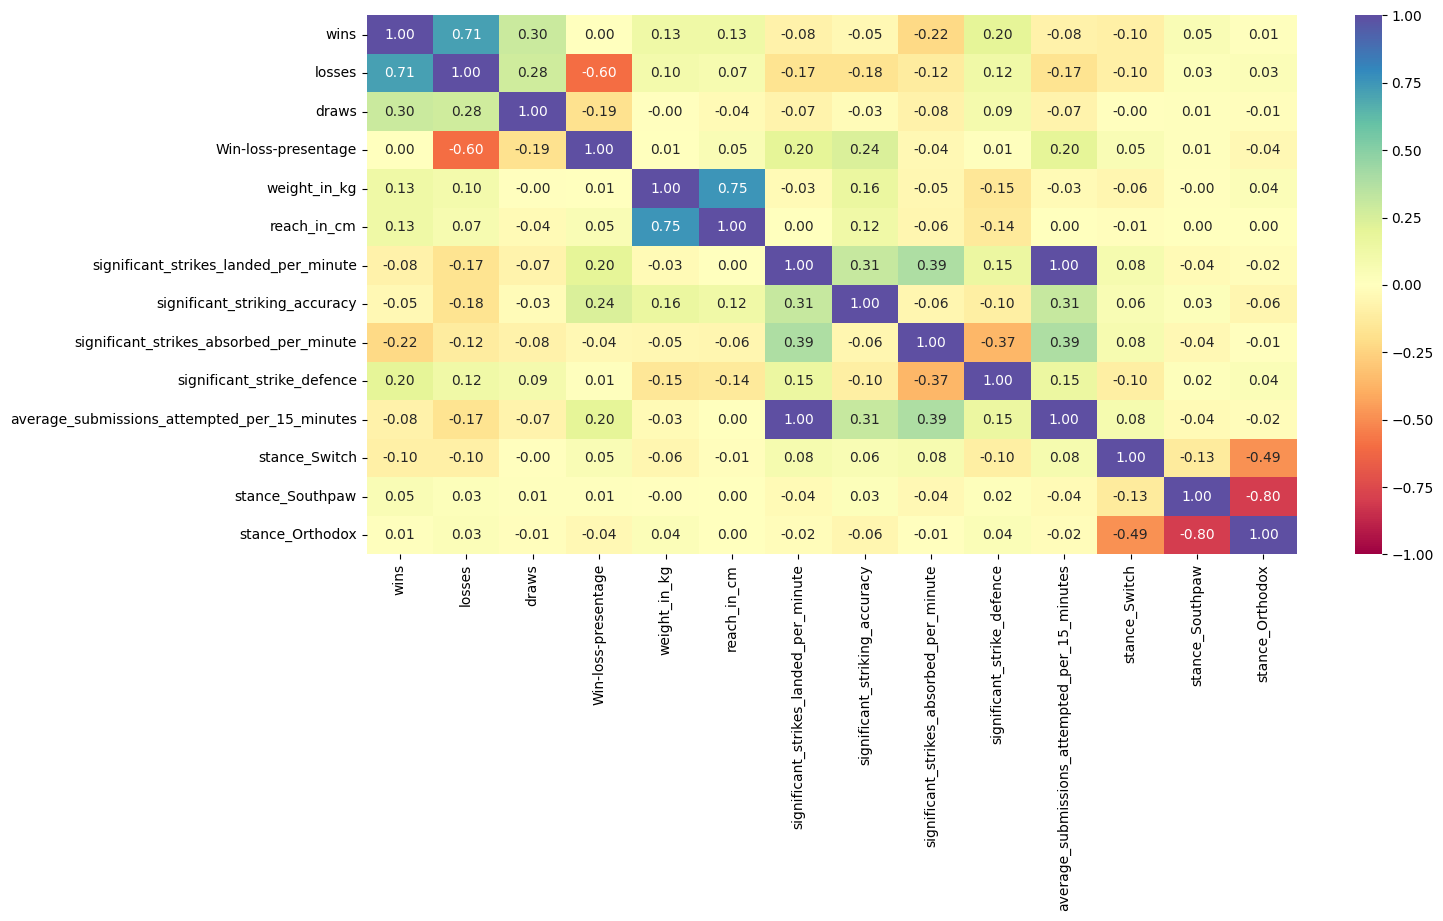

In [ ]:
corr =  dfresult[vars_of_interst].corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.show()